In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df=pd.read_csv('Train.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#CATEGORICAL FEATURES
#-ITEM IDENTIFIER
#-ITEM_FAT_CONTENT
#-ITEM_TYPE
#-OUTLET_IDENTIFIER
#-OUTLET-SIZE
#-Outlet_Type
#-Outlet_Location_Type

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# HANDLING MISSING VALUES
#MEAN - AVERAGE OF VALUES
#MODE - MOST REPEATED VALUES

In [11]:
df['Item_Weight'].mean()

12.857645184136183

In [12]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

REPLACING THE MISSING VALUES IN "OUTLET_SIZE" WITH MODE


In [14]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [15]:
#mode_of_outletsize=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [16]:
#print(mode_of_outletsize)

In [17]:
#missing_values=df['Outlet_Size'].isnull()

In [18]:
#print(missing_values)

In [19]:
#df.loc[missing_values, 'Outlet_Size']=df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outletsize)

In [20]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode(), inplace=True)

In [21]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

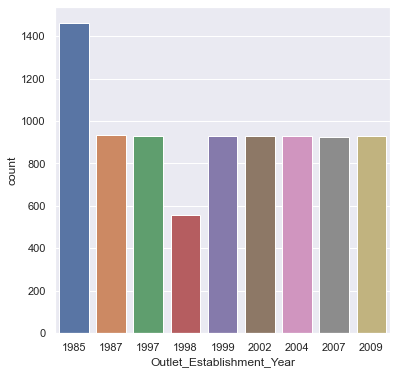

In [22]:
#outlet_establishment_year column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

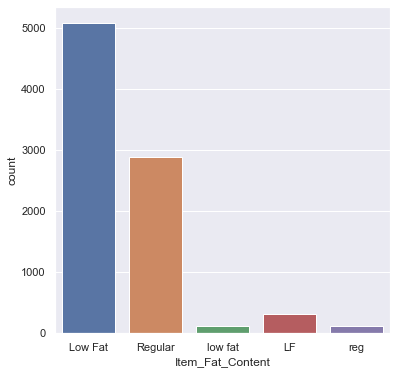

In [23]:
#Item_fat_content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

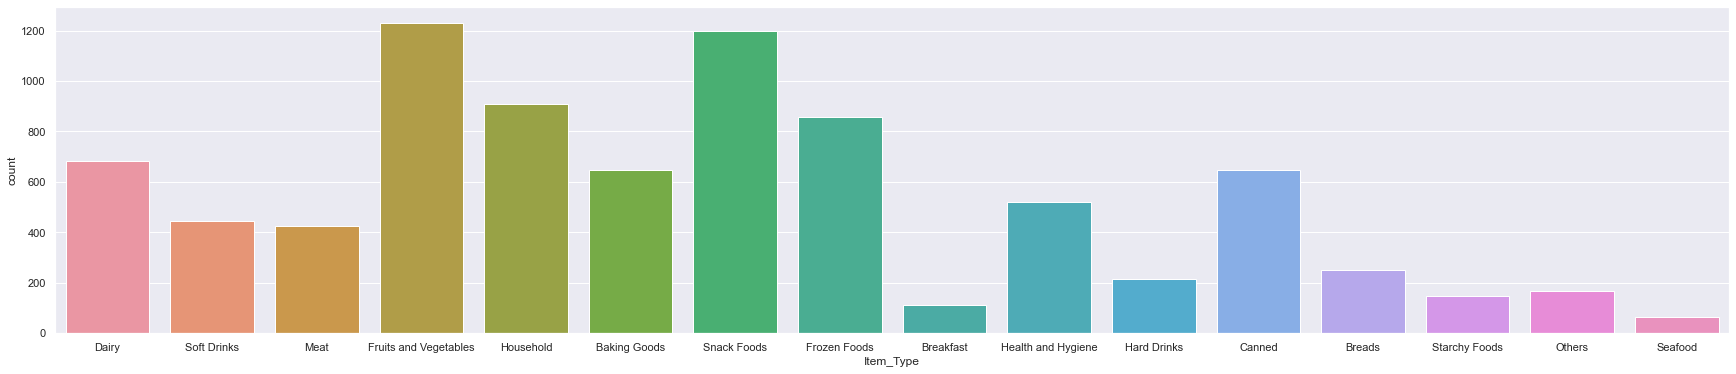

In [24]:
#Item_type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [29]:
encoder=LabelEncoder()

In [30]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])

In [31]:
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])

In [32]:
df['Item_Type']=encoder.fit_transform(df['Item_Type'])


In [33]:
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])

In [34]:
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])

In [35]:
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])

In [36]:
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])

In [37]:
x=df.drop('Item_Outlet_Sales', axis=1)
y=df[['Item_Outlet_Sales']]

In [38]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [39]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2, test_size=0.3)

In [41]:
x_train.shape

(5966, 11)

In [42]:
x_test.shape

(2557, 11)

In [43]:
#MACHINE LEARNING MODEL TRAINING

In [44]:
model=KNeighborsRegressor(n_neighbors=8)

In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [46]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [48]:
y_pred=model.predict(x_test)

In [49]:
y_pred

array([[1701.7848  ],
       [3238.7841  ],
       [1413.077275],
       ...,
       [1449.7795  ],
       [1325.691025],
       [2429.33775 ]])

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
mean_squared_error(y_test,y_pred)

2335410.3293998768

In [52]:
mean_absolute_error(y_test,y_pred)

1115.8932983965585

In [53]:
#EVALUATION 
#PREDICTION ON TRAINING DATA

In [86]:
predict=model.predict(x_train)

In [87]:
r2_train=metrics.r2_score(y_train, predict)

In [88]:
print(r2_train)

0.4134912010956653


In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model1=LinearRegression()

In [92]:
model1.fit(x_train,y_train)

LinearRegression()

In [93]:
print(model1.coef_)

[[-9.12384749e-03 -3.41227758e+00  2.59407078e+01 -1.73696358e+03
  -1.56370830e+00  1.55590159e+01  4.84392279e+01 -2.16694144e+00
   2.67201107e+00 -9.33746106e+01  8.38051697e+02]]


In [94]:
predict1=model1.predict(x_test)

In [95]:
r2_train1=metrics.r2_score(y_test, predict1)

In [96]:
print(r2_train1)

0.5080215884600511
